# project 4 

# Will be sorted into 5 parts - 
# 0 - Excec. summary
# 1- Data cleaning process
# 2.1 - First model for predicting salary(log. reg) 
# 2.2 - Second model for predicting salary(Random forest)
# 2.3 -  Third model for predicting salary(Naive Bayes)
# 3.1 First model for predicting job_class(log. reg)
# 3.2- Second model for predicting job_class(Random forest) 
# 3.3- Third model for predicting job_class(Naive Bayes

# 0 - Exec. Summary


****NB- on the Sunday before this was due i accidently overwrote my original CSV file, requiring me to adjust my model in part, resulting in some of my output not exactly fitting accordingly due to discrepencies within my data

This goal of this project was 2-folded; 
   1 - To find the features predicting job salary, 
   2 - To find the features predicting job_title
   
   1- 
   To find the key features required to predict job salary, i employed the use of 3 models~
       1.1 - Logistic Reg.
       1.2 - Random Forest 
       1.3 - Naive Bayes
   2- 
   To find the key features predicting job_title, i used the same 3 models~
       2.1 - Log reg 
       2.2 - Random Forest
       2.3 - Naive Bayes
       
       However, before these questions can be answered- the first obstacle to be faced was the manual data 
       extraction required through, in my case, scrapy & a spider. Due to this, i was required to make a 
       great deal of assumptions regarding to me data. This process was by far the most difficult 
       component of project 4 for me, as i had originally attempted to use beautiful soup, however i since 
       used scrapy  as i found it to be, in part, a (small) bit more intuituive. The website chosen to scrape 
       was SEEK, searching for job listings associated with 'data science'. From this, i extracted 4200 
       listings, however only 8% of these had salary details. From this, i seperated the salary into 3
       bins, these being:
           Low(0-80k)
           Medium(80-100k)
           High(100k+)
       From this, i attempted to made these classification classes as the target, with factors including job 
       location & nlp processes from text analysis to predict which bin jobs would belong in. 
       
      
    For the second part of this brief, the goal being to predict 'job title', the primary jobs i concentrated upon
    being 
        Data scientist 
        Data analayst
        Data engineer
        
    From this, i then used the very same techniques used as within part 1 of the model to best predict
    'job_title"
    
    
    
    The biggest drawback to these models and this project as a whole for me being, the extrmely poor quality of
    data i had aquired. To best explain as to how this affected my model being - this project was alike me 
    building a house with bricks made of glass, with this poor data proving to hinder me at every turn of 
    completing this project. 
    
    Further analysis to better develop this project could include steps to scrape secondary websites from 
    job salary websites such as glassdoor to cross-validate the predicted salary's generated from question 1. 
    

# 1.1 - Scraping - run on VS code

In [1]:
# import requests
# from requests.models import Response
# from lxml import html 
# import scrapy
# from urllib.parse import urljoin

# class seek_spider(scrapy.Spider):
#     name="dsciencespider"
#     allowed_url = ["https://www.seek.com.au"]
#     start_urls = ["https://www.seek.com.au/data-analyst-jobs"]

    
#     #Lets get all the jobs and links, 1st parse method 
#     def parse(self, response):
#             trawl_urls = response.xpath('//a[@class="_2S5REPk"]/@href').extract()

#             for url in trawl_urls:
#                 nexturl = response.urljoin(url)
#                 yield scrapy.Request(url = nexturl, callback = self.parse_details)
#                 nextpg = response.xpath('//a[@data-automation="page-next"]/@href').extract_first()

#             #what to do if no more pages? ``
#             if nextpg is not None: 
#                 nextpg = response.urljoin(nextpg)
#                 yield scrapy.Request(url = nextpg, callback = self.parse)
#     def parse_details(self, response):
#         yield{                                      
#             # job title 
#              'job_title' : response.xpath("//div[@class='FYwKg _6Gmbl_4']/h1/text()").extract(),
           
#              "job description': response.xpath("//div[@class='FYwKg PrHFr _1EtT-_4']/text()").extract(),
    
#             }


# 1.2 - EDA time


In [2]:
#large amount of playing with this messy, messy data involved

In [3]:
import pandas as pd 
import dtale
import re as re 
import numpy as np

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings

import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk import punkt
nltk.download('stopwords')
from nltk import wordpunct_tokenize
nltk.download('wordnet')
import re 
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
nltk.download('punkt')
import statsmodels.formula.api as sm




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexjacob/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexjacob/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alexjacob/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#lets get our CSV's

dataanalyst = pd.read_csv("/Users/alexjacob/Desktop/danalyst.csv")

datasci = pd.read_csv("/Users/alexjacob/Desktop/p4data.csv")

data = pd.concat([datasci,dataanalyst],ignore_index=True)

In [5]:
data

,job_title,job_info
0,Data Analyst/Developer,"Adelaide,Information & Communication Technolog..."
1,Data Scientist / Data Consultant,"Perth,CBD, Inner & Western Suburbs,Information..."
2,Data Analyst,"Sydney,CBD, Inner West & Eastern Suburbs,Infor..."
3,Head of Data and Analytics,"Melbourne,CBD & Inner Suburbs,Information & Co..."
4,Data Analyst,"Sydney,CBD, Inner West & Eastern Suburbs,Infor..."
...,...,...
6192,Datawareshoue Architect,"Melbourne,CBD & Inner Suburbs,Information & Co..."
6193,SAP BI & Analytics Manager,"Sydney,CBD, Inner West & Eastern Suburbs,Infor..."
6194,Python Developer (Contract),"Melbourne,Bayside & South Eastern Suburbs,Info..."
6195,Senior Performance & Attribution Analyst,"Sydney,CBD, Inner West & Eastern Suburbs,Banki..."


In [6]:
#now i need to extract the relevant columns required to make this

data = data.astype(str)

data.dtypes 

job_title    object
job_info     object
dtype: object

In [7]:
#now lets make the location, salary and description info based off this! 

data["location"] = data["job_info"][1] 
#| data["job_info"][2]

print(data.location.iloc[1])


data["location"] = data["job_info"].apply(lambda x: x.split(" ")[0])

Perth,CBD, Inner & Western Suburbs,Information & Communication Technology,Consultants,Full Time


In [8]:
#now we have location 


# - lets get salary

In [9]:
#extracting the numbers from the info column to create salary

In [10]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

data["salary"] = data["job_info"].apply(lambda x: find_number(x))

#now we have salary

#now lets remove the duplicates from salary and location from job_info 

data["job_info"] = data.apply(lambda x: x["job_info"].replace(x["location"],""),axis=1)

data["job_info"] = data.apply(lambda x: x["job_info"].replace(x["salary"],""),axis=1)

# - now lets do job-title

In [11]:
dtale.show(data.job_title.unique())

In [12]:
#we have way too many that aren't data-related, lets rkeep thos only with 'data'

data = data[data["job_title"].str.contains("Data|data")==True]



#now lets remove any duplicates 

data = data.drop_duplicates()
data.reset_index(drop=True, inplace = True)


# -now we just need salary

In [13]:
#lets change the blank salary's to becoming NAN's,
#furthermore, due to inconsistency of my scraped data i was forced to change my make assumption pertaining to my 
#collected data for salary

In [14]:
#copys repeatedly made to avoi the copywithoutwarning error
data1 = data

data2 = data1

data1= data2

data1["salary"] = data1["salary"].replace([""], "NaN")

data1.salary.unique

<bound method Series.unique of 0       92 784 98 143
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
1050              NaN
1051           61 348
1052              NaN
1053              NaN
1054              NaN
Name: salary, Length: 1055, dtype: object>

In [15]:
#now we play with the SALARY 

data2 = data1.copy()

data2

data2.salary = data2.salary.astype(str)

data2.salary = data2.salary.str.replace("'","",regex=True)

In [16]:
data2.dtypes

job_title    object
job_info     object
location     object
salary       object
dtype: object

In [17]:
data2["Salary"] = data2["salary"].replace("''","a",regex=True)

#lets remove special characters from the salary

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","&"]


for char in spec_chars:
    data2['salary'] = data2["salary"].str.replace(char, ' ', regex=True)

data2["Salary"] = data2["salary"].str.replace("'","")


#lets make seperate columns and then filter depending on the amount of info in the salary column

data2["Salary"] = data2.salary.apply(lambda x: len(str(x))>9)

# - now for location 

In [18]:
#lets have a bigger play with location and segregate the locations to be state-specific

In [19]:
data2.location.unique()

array(['Adelaide,Information', 'Perth,CBD,', 'Sydney,CBD,',
       'Melbourne,CBD', 'Melbourne,Northern', 'Adelaide,Government',
       'Newcastle,', 'Gold', 'ACT,Administration', 'Sydney,Parramatta',
       'Perth,Mining,', 'Brisbane,CBD', 'ACT,Information',
       'Melbourne,Information', 'Sydney,Information', 'Melbourne,Eastern',
       'Sydney,Ryde', 'Melbourne,Bayside', 'Melbourne,Science',
       'Bendigo,', 'Sydney,Science', 'Sydney,North', 'Adelaide,Science',
       'ACT,Science', 'Wagga', 'ACT,Government', 'Bunbury',
       'Perth,Information', 'Sydney,Marketing', 'Brisbane,Education',
       'Brisbane,Information', 'Yarra', 'Perth,Science', 'Hobart,Science',
       'Sydney,Banking', 'ACT,Education', 'Sydney,Design',
       'Melbourne,Education', 'Melbourne,Banking', 'Darwin,Information',
       'Sydney,Sales,Analysis', 'Melbourne,Consulting',
       'Brisbane,Northern', 'Sydney,South', 'Perth,Eastern',
       'Darwin,Marketing', 'South', 'Brisbane,Engineering,Other,Full',
   

In [20]:
#lets change this now so we only have the state for each job!

data2.location = data2["location"].str.replace("Perth", "WA")

data2.location = data2.location.str.replace("Ballarat", "NSW") 

data2.location = data2.location.str.replace("Albury", "NSW") 

data2.location = data2.location.str.replace("Gosford", "NSW") 

data2.location = data2.location.str.replace("Brisbane", "QLD") 

data2.location = data2.location.str.replace("Gold", "QLD") 

data2.location = data2.location.str.replace("Yarra", "VIC") 

data2.location = data2.location.str.replace("Wollongong", "NSW") 

data2.location = data2.location.str.replace("Melbourne", "VIC") 

data2.location = data2.location.str.replace("Wagga", "NSW") 

data2.location = data2.location.str.replace("Newcastle", "NSW") 

data2.location = data2.location.str.replace("Bunbery", "NSW") 

data2.location = data2.location.str.replace("Sydney", "NSW") 

data2.location = data2.location.str.replace("Sydney", "NSW") 

data2.location = data2.location.str.replace("Darwin", "NT") 

data2.location = data2.location.str.replace("Alice", "NT") 

data2.location = data2.location.str.replace("Hobart", "TAS") 

data2.location = data2.location.str.replace("Whyalla", "SA") 

data2.location = data2.location.str.replace("Bendigo", "NSW") 

data2.location = data2.location.str.replace("Bunbury", "WA") 

data2.location = data2.location.str.replace("Adelaide", "SA") 

data2.location = data2.location.str.replace("WA,", "WA") 

data2.location = data2.location.str.replace("SA,", "SA") 

data2.location = data2.location.str.replace("NT,", "NT") 

data2.location = data2.location.str.replace("SAI", "SA") 

In [21]:
data2

,job_title,job_info,location,salary,Salary
0,Data Analyst/Developer,"& Communication Technology,Developers/Program...",SAnformation,92 784 98 143,True
1,Data Scientist / Data Consultant,"Inner & Western Suburbs,Information & Communi...","WACBD,",NaN,False
2,Data Analyst,"Inner West & Eastern Suburbs,Information & Co...","NSW,CBD,",NaN,False
3,Head of Data and Analytics,"& Inner Suburbs,Information & Communication T...","VIC,CBD",NaN,False
4,Data & Research Graduate,"Suburbs,Consulting & Strategy,Other,Contract/...","VIC,Northern",NaN,False
...,...,...,...,...,...
1050,Azure Data Engineer,"& Communication Technology,Engineering - Soft...","ACT,Information",NaN,False
1051,Data Processing Assistant,"Inner West & Eastern Suburbs,Administration &...","NSW,CBD,",61 348,False
1052,EOI - Database and Application Administrator (...,"& Communication Technology,Database Developme...","NSW,Information",NaN,False
1053,Senior Database Administrator - Multiple Roles,"& Communication Technology,Database Developme...","QLD,Information",NaN,False


In [22]:
data2["location"] = data2["location"].str[:3]

data3 = data2.copy()

In [23]:
data3

,job_title,job_info,location,salary,Salary
0,Data Analyst/Developer,"& Communication Technology,Developers/Program...",SAn,92 784 98 143,True
1,Data Scientist / Data Consultant,"Inner & Western Suburbs,Information & Communi...",WAC,NaN,False
2,Data Analyst,"Inner West & Eastern Suburbs,Information & Co...",NSW,NaN,False
3,Head of Data and Analytics,"& Inner Suburbs,Information & Communication T...",VIC,NaN,False
4,Data & Research Graduate,"Suburbs,Consulting & Strategy,Other,Contract/...",VIC,NaN,False
...,...,...,...,...,...
1050,Azure Data Engineer,"& Communication Technology,Engineering - Soft...",ACT,NaN,False
1051,Data Processing Assistant,"Inner West & Eastern Suburbs,Administration &...",NSW,61 348,False
1052,EOI - Database and Application Administrator (...,"& Communication Technology,Database Developme...",NSW,NaN,False
1053,Senior Database Administrator - Multiple Roles,"& Communication Technology,Database Developme...",QLD,NaN,False


In [24]:
data3.location = data3.location.str.replace("WAC", "WA") 
data3.location = data3.location.str.replace("SAn,", "SA")
data3.location = data3.location.str.replace("SAG,", "SA") 
data3.location = data3.location.str.replace("WAM,", "WA")
data3.location = data3.location.str.replace("WAM", "WA") 
data3.location = data3.location.str.replace("SAS,", "SA") 
data3.location = data3.location.str.replace("WAI,", "WA") 
data3.location = data3.location.str.replace("WAS,", "WA")
data3.location = data3.location.str.replace("WAE,", "WA") 
data3.location = data3.location.str.replace("NTI,", "NT") 
data3.location = data3.location.str.replace("NTM,", "NT") 
data3.location = data3.location.str.replace("SAM,", "SA")
data3.location = data3.location.str.replace("SAA,", "SA") 
data3.location = data3.location.str.replace("WAF,", "WA") 
data3.location = data3.location.str.replace("SAC,", "SA")
data3.location = data3.location.str.replace("SAE,", "SA") 
data3.location = data3.location.str.replace("SAH,", "SA") 
data3.location = data3.location.str.replace("NTE,", "NT") 

In [25]:
data3.location.unique()

array(['SAn', 'WA', 'NSW', 'VIC', 'SAG', 'QLD', 'ACT', 'SAS', 'WAI',
       'WAS', 'TAS', 'NTI', 'WAE', 'NTM', 'Sou', 'Asi', 'Ame', 'SAM',
       'SAA', 'WAF', 'SA', 'SAC', 'SAE', 'SAH', 'NTE', 'NT'], dtype=object)

In [26]:
#now lets drop all that dont fit in the states

In [27]:
data3.location.value_counts()

NSW    430
VIC    298
QLD    127
ACT     84
WA      52
SAn     19
WAI      9
SAG      5
TAS      5
SAA      3
SAM      3
SAS      2
Sou      2
SAE      2
WAS      2
SAC      2
SA       1
NT       1
WAF      1
NTM      1
WAE      1
NTE      1
Asi      1
SAH      1
Ame      1
NTI      1
Name: location, dtype: int64

In [28]:
data3 = data3[data3.location.isin(["NSW","VIC","NT","WA","ACT","TAS","SA"])]#add to this

In [29]:
#Now we have our states!

# -Salary pt II 

In [30]:
#lets play with salary a bit more 

#for my next trick, i will rearrange SALARY into 3 seperate bins, based upon the bins of; 

#high salary = 100+
# medium salary = 80-99 
# low = < 80 

#i know this isnt the best way to sort salary,however am forced to make these assumptions due to poor quality of originally scraped data

In [31]:
data3["high_sal"] =np.where(data3["salary"].str.match("1"), 1, 0)

data3["Med_sal"] =np.where(data3["salary"].str.match("8","9"), 1,0)

<ipython-input-31-a694a665e2a3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-a694a665e2a3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
#i dont need to do "low_salary" as that can be the dummy variable

conditions = [
    (data3["high_sal"] == 0) &
    (data3["Med_sal"]== 0)
]

values = [1]

data3["Low_sal"] = np.select(conditions, values)

<ipython-input-32-1ab4d0077616>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
data3.Low_sal.value_counts()

1    723
0    148
Name: Low_sal, dtype: int64

In [34]:
data5= data3.copy( )

In [35]:
data5.salary.value_counts()

NaN                   616
700 900                 4
79 648 108 848          4
12                      4
15 4                    3
                     ... 
94 283 105 385 9 5      1
110 000 149 999         1
90 000                  1
112141 135071           1
145 000 18              1
Name: salary, Length: 189, dtype: int64

In [36]:
#Drop the rest of the NAN's

data5 = data5.drop("salary", axis=1)

# data4 = data4.drop("Salary1", axis = 1 )

data5 = data5.drop("Salary", axis = 1 )
# data5 = data5.drop("Salary1", axis = 1 )

#Now we essentially have our salary values as bool values

# Now to do some text cleaning

In [37]:
#now lets do some text cleaning 

In [38]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [39]:
stop_words = set(stopwords.words('english'))


In [40]:
data6 = data5.copy()

In [41]:
#DONT DELETE BELOW

In [42]:
#this had to be amended with my new scraped data, kept it in to show as its a awesome little piece of code

In [43]:

# def clean_text(text, remove_stopwords = True ):
#     '''Text Preprocessing '''
    
#     # Convert words to lower case
#     text = text.lower()
    
#     # Expand contractions
#     if True:
#         text = text.split()
#         new_text = []
#         for word in text:
#             if word in contractions:
#                 new_text.append(contractions[word])
#             else:
#                 new_text.append(word)
#         text = " ".join(new_text)
    
#     # Format words and remove unwanted characters
#     text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
#     text = re.sub(r'\<a href', ' ', text)
#     text = re.sub(r'&amp;', '', text) 
#     text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
#     text = re.sub(r'<br />', ' ', text)
#     text = re.sub(r'\'', ' ', text)
    
# #     # remove stopwords
# #     if remove_stopwords:
# #         text = text.split()
# #         stops = set(stopwords.words("english"))
# #         text = [w for w in text if not w in stops]
# #         text = " ".join(text)

# #     Tokenize each word
#     text =  nltk.WordPunctTokenizer().tokenize(text)
    
# #     Lemmatize each token
# #     lemm = nltk.stem.WordNetLemmatizer()
# #     text = list(map(lambda word:list(map(lemm.lemmatize, word)), text))
    
#     return text

In [44]:
data6

,job_title,job_info,location,high_sal,Med_sal,Low_sal
1,Data Scientist / Data Consultant,"Inner & Western Suburbs,Information & Communi...",WA,0,0,1
2,Data Analyst,"Inner West & Eastern Suburbs,Information & Co...",NSW,0,0,1
3,Head of Data and Analytics,"& Inner Suburbs,Information & Communication T...",VIC,0,0,1
4,Data & Research Graduate,"Suburbs,Consulting & Strategy,Other,Contract/...",VIC,0,0,1
6,Data Analyst,"Maitland & Hunter,Information & Communication...",NSW,1,0,0
...,...,...,...,...,...,...
1049,SQL Server Database Management Engineer,"& Communication Technology,Developers/Program...",VIC,0,0,1
1050,Azure Data Engineer,"& Communication Technology,Engineering - Soft...",ACT,0,0,1
1051,Data Processing Assistant,"Inner West & Eastern Suburbs,Administration &...",NSW,0,0,1
1052,EOI - Database and Application Administrator (...,"& Communication Technology,Database Developme...",NSW,0,0,1


In [45]:


lemmatized_words = []
for text in data6.job_info:
    text = text.lower() 
    text =re.sub("\\W+"," ",text)   # remove special characters
    tb = TextBlob(str(text))
    words = [word.lemmatize('n') for word in tb.words]
    lemmatized_words.append(words)
data6['text'] = lemmatized_words

data6['text'] = data6.text.map(lambda x: ' '.join(x))
data6

,job_title,job_info,location,high_sal,Med_sal,Low_sal,text
1,Data Scientist / Data Consultant,"Inner & Western Suburbs,Information & Communi...",WA,0,0,1,inner western suburb information communication...
2,Data Analyst,"Inner West & Eastern Suburbs,Information & Co...",NSW,0,0,1,inner west eastern suburb information communic...
3,Head of Data and Analytics,"& Inner Suburbs,Information & Communication T...",VIC,0,0,1,inner suburb information communication technol...
4,Data & Research Graduate,"Suburbs,Consulting & Strategy,Other,Contract/...",VIC,0,0,1,suburb consulting strategy other contract temp
6,Data Analyst,"Maitland & Hunter,Information & Communication...",NSW,1,0,0,maitland hunter information communication tech...
...,...,...,...,...,...,...,...
1049,SQL Server Database Management Engineer,"& Communication Technology,Developers/Program...",VIC,0,0,1,communication technology developer programmer ...
1050,Azure Data Engineer,"& Communication Technology,Engineering - Soft...",ACT,0,0,1,communication technology engineering software ...
1051,Data Processing Assistant,"Inner West & Eastern Suburbs,Administration &...",NSW,0,0,1,inner west eastern suburb administration offic...
1052,EOI - Database and Application Administrator (...,"& Communication Technology,Database Developme...",NSW,0,0,1,communication technology database development ...


In [46]:
data6.dtypes

job_title    object
job_info     object
location     object
high_sal      int64
Med_sal       int64
Low_sal       int64
text         object
dtype: object

In [47]:
data99 = data6.copy()

In [48]:
data99.dtypes 

job_title    object
job_info     object
location     object
high_sal      int64
Med_sal       int64
Low_sal       int64
text         object
dtype: object

In [49]:
data99["text"] = data99["text"].astype(str)

#lets get rid of the spaces too

data99['text'] = data99['text'].str.split().str.join(" ")


spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","&"]


for char in spec_chars:
    data99['text'] = data99["text"].str.replace(char, ' ', regex=True)

In [50]:
dtale.show(data99)


In [51]:
#Realised need to clean a little bit more

data99.text = data99.text.str.replace("suburb", "")
data99.text = data99.text.str.replace("inner", "")
data99.text = data99.text.str.replace("west", "")
data99.text = data99.text.str.replace("east", "")
data99.text = data99.text.str.replace("ern", "")


data6 = data99

# Model 2.1 - log w/ either BOW or TFIDF

# DATA PREPROCESSING for Q.1

In [52]:
data6

,job_title,job_info,location,high_sal,Med_sal,Low_sal,text
1,Data Scientist / Data Consultant,"Inner & Western Suburbs,Information & Communi...",WA,0,0,1,information communication technology consul...
2,Data Analyst,"Inner West & Eastern Suburbs,Information & Co...",NSW,0,0,1,information communication technology busin...
3,Head of Data and Analytics,"& Inner Suburbs,Information & Communication T...",VIC,0,0,1,information communication technology databas...
4,Data & Research Graduate,"Suburbs,Consulting & Strategy,Other,Contract/...",VIC,0,0,1,consulting strategy other contract temp
6,Data Analyst,"Maitland & Hunter,Information & Communication...",NSW,1,0,0,maitland hunter information communication tech...
...,...,...,...,...,...,...,...
1049,SQL Server Database Management Engineer,"& Communication Technology,Developers/Program...",VIC,0,0,1,communication technology developer programmer ...
1050,Azure Data Engineer,"& Communication Technology,Engineering - Soft...",ACT,0,0,1,communication technology engineering software ...
1051,Data Processing Assistant,"Inner West & Eastern Suburbs,Administration &...",NSW,0,0,1,administration office support data entry w...
1052,EOI - Database and Application Administrator (...,"& Communication Technology,Database Developme...",NSW,0,0,1,communication technology database development ...


In [53]:
#lets make a sal class column to use later
sal_class = list()
for i in data6.index:
    if data6.loc[i,'Low_sal'] == 1:
        sal_class.append(1)
    elif data6.loc[i,'Med_sal'] == 1:
        sal_class.append(2)
    elif data6.loc[i,'high_sal'] == 1:
        sal_class.append(3)
    else:
        sal_class.append(0)

len(sal_class)

871

In [54]:
dfq1 = data6[["job_title","text", "location","high_sal","Med_sal","Low_sal"]]

dfq11 = dfq1.copy()

dfq11["Sal_class"] = sal_class

y = pd.Series(dfq11["Sal_class"])
#my x will be made in the following section


In [55]:
print(y.shape )

(871,)


# Model 1.1 - Log. reg

# -creating the predictor matrix including; title, text & location 

In [56]:
#First lets find our baseline

<bound method IndexOpsMixin.value_counts of 1       1
2       1
3       1
4       1
6       3
       ..
1049    1
1050    1
1051    1
1052    1
1054    1
Name: Sal_class, Length: 871, dtype: int64>

In [57]:

dfq11.Sal_class.value_counts(normalize=True)



2021-06-30 20:23:46,450 - INFO     - NumExpr defaulting to 8 threads.


1    0.830080
3    0.133180
2    0.036739
Name: Sal_class, dtype: float64

In [58]:
#baseline is a bit crazy - attributing to the poor data we have 

In [59]:
#for our predictor matrix, need to play around with some variables, firstly by dummying location and will then 
#dummy my NLP job description

In [60]:
dummies = pd.get_dummies(data = dfq11, columns = [ "location"])

dummies 

,job_title,text,high_sal,Med_sal,Low_sal,Sal_class,location_ACT,location_NSW,location_NT,location_SA,location_TAS,location_VIC,location_WA
1,Data Scientist / Data Consultant,information communication technology consul...,0,0,1,1,0,0,0,0,0,0,1
2,Data Analyst,information communication technology busin...,0,0,1,1,0,1,0,0,0,0,0
3,Head of Data and Analytics,information communication technology databas...,0,0,1,1,0,0,0,0,0,1,0
4,Data & Research Graduate,consulting strategy other contract temp,0,0,1,1,0,0,0,0,0,1,0
6,Data Analyst,maitland hunter information communication tech...,1,0,0,3,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,SQL Server Database Management Engineer,communication technology developer programmer ...,0,0,1,1,0,0,0,0,0,1,0
1050,Azure Data Engineer,communication technology engineering software ...,0,0,1,1,1,0,0,0,0,0,0
1051,Data Processing Assistant,administration office support data entry w...,0,0,1,1,0,1,0,0,0,0,0
1052,EOI - Database and Application Administrator (...,communication technology database development ...,0,0,1,1,0,1,0,0,0,0,0


In [61]:
#train test split 

In [62]:
X_trainm1, X_testm1, y_trainm1, y_testm1 =  train_test_split(dummies, y, test_size=0.33, 
                                             random_state=42)

In [63]:
dtale.show(X_trainm1)

In [64]:
X_trainm1.shape, X_testm1.shape

((583, 13), (288, 13))

In [65]:
#now to play with the text
text_train = X_trainm1.text
text_test = X_testm1.text

In [66]:
# initialise CountVectorizer 1
cv1 = CountVectorizer(max_df=0.3, max_features=2000, min_df=1, ngram_range=(1,2), stop_words= stop_words)

# transform train and test dataset
trainm1cv1 = cv1.fit_transform(text_train)
testm1cv1 = cv1.transform(text_test)

# merge transformed dtm to dummied features
cv1_train = pd.DataFrame(data = trainm1cv1.toarray(), columns=cv1.get_feature_names())
cv1_test = pd.DataFrame(data = testm1cv1.toarray(), columns=cv1.get_feature_names())


In [67]:
cv1_train

,00,00 130000,00 152204,00 155000,00 contract,00 flexible,00 full,00 per,00 super,000,...,work flexibility,working,working contract,working exceptional,year,year project,yr1,yr1 118,yr6,yr6 excl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#combine my count vect. with dummied location 
X_train_cv1 = X_trainm1.merge(cv1_train, on = X_trainm1.index)
X_train_cv1.drop(['key_0','text','job_title'], axis =1, inplace=True)

X_test_cv1 = X_testm1.merge(cv1_test, on = X_testm1.index)
X_test_cv1.drop(['key_0', 'text',"job_title"], axis =1, inplace=True)


X_train_cv1.shape, X_test_cv1.shape

((583, 1401), (288, 1401))

In [69]:
X_train_cv1.shape, y_trainm1.shape

((583, 1401), (583,))

In [70]:
X_test_cv1.shape, y_testm1.shape

((288, 1401), (288,))

In [71]:
LOGREG1 = GridSearchCV(LogisticRegression(random_state=42), 
                       param_grid={"C":[0.001,0.01,0.1,1], 'max_iter':[100,200,300,400,500]},
                      cv = 3,
                      n_jobs=-1,
                      verbose=1)

LOGREG1.fit(X_train_cv1, y_trainm1)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300, 400, 500]},
             verbose=1)

In [130]:
LOGREG1TEST = GridSearchCV(LogisticRegression(random_state=42), 
                       param_grid={"C":[0.001,0.01,0.1,1], 'max_iter':[100,200,300,400,500]},
                      cv = 3,
                      n_jobs=-1,
                      verbose=1)

LOGREG1TEST.fit(X_test_cv1, y_testm1)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300, 400, 500]},
             verbose=1)

In [72]:
LOGREG1S = LOGREG1.score(X_train_cv1, y_trainm1)

In [73]:
print(LOGREG1S)

1.0


In [131]:
LOGREG1TEST = LOGREG1S.score(X_test_cv1, y_testm1)

AttributeError: 'numpy.float64' object has no attribute 'score'

In [75]:
#lets make this into a df for us to then visualise

In [76]:
#now to visualise;
tokens = X_train_cv1.columns
importances_low = LOGREG1.best_estimator_.coef_[0]
importances_mid = LOGREG1.best_estimator_.coef_[1]
importances_high = LOGREG1.best_estimator_.coef_[2]

In [77]:
LOGREGDF = pd.DataFrame({'token': tokens,
                           'low_coef': importances_low,
                           'low_coef_abs': abs(importances_low),
                           'mid_coef': importances_mid,
                           'mid_coef_abs': abs(importances_mid),
                           'high_coef': importances_high,
                           'high_coef_abs': abs(importances_high),})

#show best features


<IPython.core.display.Javascript object>


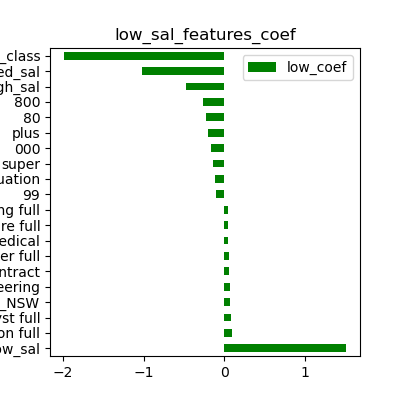

<IPython.core.display.Javascript object>


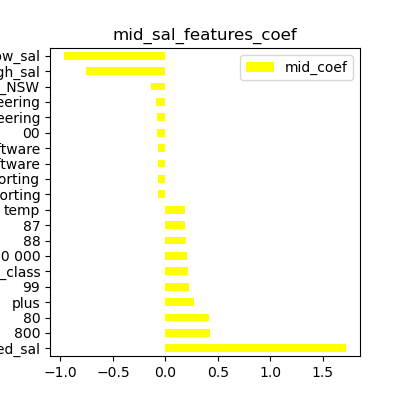

<IPython.core.display.Javascript object>


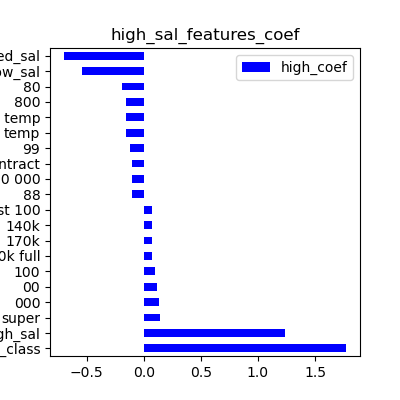

In [78]:

low_sal_bracket = LOGREGDF[['token','low_coef','low_coef_abs']].sort_values('low_coef', ascending=False)
low_sal_bracket_top = low_sal_bracket[:10]
low_sal_bracket_bottom = low_sal_bracket[-10:]
low_sal_bracket_merge = pd.concat([low_sal_bracket_top, low_sal_bracket_bottom])
low_sal_bracket_merge.plot(kind = 'barh',
              x = 'token',
              y = 'low_coef',
              title = 'low_sal_features_coef',
              color = 'green',figsize = (4,4));
             

mid_sal_bracket = LOGREGDF[['token','mid_coef','mid_coef_abs']].sort_values('mid_coef', ascending=False)

mid_sal_bracket_top = mid_sal_bracket[:10]
mid_sal_bracket_bottom = mid_sal_bracket[-10:]
mid_sal_bracket_merge = pd.concat([mid_sal_bracket_top, mid_sal_bracket_bottom])
mid_sal_bracket_merge.plot(kind = 'barh',
              x = 'token',
              y = 'mid_coef',
              title = 'mid_sal_features_coef',
              color = 'yellow',figsize = (4,4));

high_sal_bracket = LOGREGDF[['token','high_coef','high_coef_abs']].sort_values('high_coef', ascending=False)
high_sal_bracket_top = high_sal_bracket[:10]
high_sal_bracket_bottom = high_sal_bracket[-10:]
high_sal_bracket_merge = pd.concat([high_sal_bracket_top, high_sal_bracket_bottom])
high_sal_bracket_merge.plot(kind = 'barh',
              x = 'token',
              y = 'high_coef',
              title = 'high_sal_features_coef',
              color = 'blue',figsize = (4,4));

# Model 1.2 - random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier


In [83]:

RandFparams1 = {'max_depth': [8,12],
             'max_features':[10,20],
             'min_samples_split':[4,8],
             'n_estimators': [1000,1500]}

Randgs = GridSearchCV(RandomForestClassifier(random_state=42), RandFparams1, cv = 3, n_jobs = -1, verbose=1)
Randgs.fit(X_train_cv1, y_trainm1)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   11.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 12], 'max_features': [10, 20],
                         'min_samples_split': [4, 8],
                         'n_estimators': [1000, 1500]},
             verbose=1)

In [92]:

RandFparams1TEST = {'max_depth': [8,12],
             'max_features':[10,20],
             'min_samples_split':[4,8],
             'n_estimators': [1000,1000]}

RandgsTEST = GridSearchCV(RandomForestClassifier(random_state=42), RandFparams1, cv = 3, n_jobs = -1, verbose=1)
RandgsTEST.fit(X_test_cv1,y_testm1)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   11.5s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 12], 'max_features': [10, 20],
                         'min_samples_split': [4, 8],
                         'n_estimators': [1000, 1500]},
             verbose=1)

In [ ]:
#now lets have a look at the best estimator 

In [93]:
print(Randgs.best_estimator_ )

print(RandgsTEST.best_estimator_)

print(Randgs.best_score_)
print(RandgsTEST.best_score_)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_split=4,
                       n_estimators=1500, random_state=42)
RandomForestClassifier(max_depth=12, max_features=20, min_samples_split=4,
                       n_estimators=1000, random_state=42)
0.890192968543484
0.9444444444444443


In [94]:
RandgsDF1 = pd.DataFrame({"token":X_train_cv1.columns, 
                        "co-efficient": Randgs.best_estimator_.feature_importances_})

In [95]:
RandgsDF1

,token,co-efficient
0,high_sal,0.101242
1,Med_sal,0.047338
2,Low_sal,0.103759
3,Sal_class,0.098265
4,location_ACT,0.000398
...,...,...
1396,year project,0.000621
1397,yr1,0.000258
1398,yr1 118,0.000334
1399,yr6,0.000491


In [96]:
RandgsDF1.sort_values("co-efficient",ascending = False)[0:20]

,token,co-efficient
2,Low_sal,0.103759
0,high_sal,0.101242
3,Sal_class,0.098265
1,Med_sal,0.047338
20,000,0.014364
363,800,0.013344
1268,super,0.012469
56,100,0.011660
1291,superannuation full,0.011087
57,100 000,0.010583


In [97]:
RandgsDF1top = RandgsDF1.sort_values("co-efficient",ascending = False)[0:20]

<IPython.core.display.Javascript object>


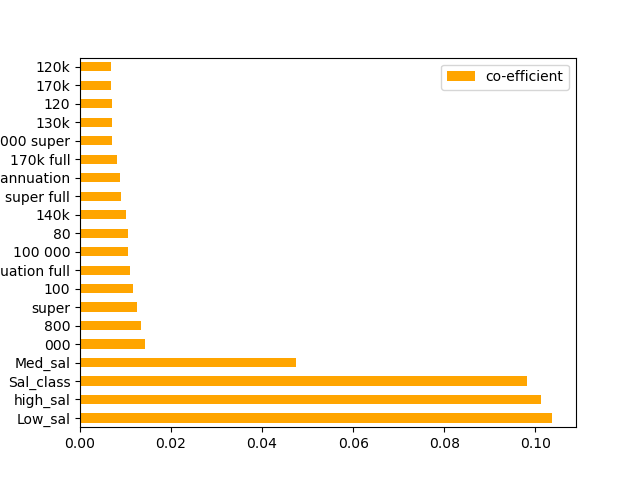

<AxesSubplot:ylabel='token'>

In [98]:
RandgsDF1top.plot(kind = "barh", x = "token", y = "co-efficient", color = 'orange')

# Model 2.1 - Predicting title off key feature data preprocessing

In [99]:
dfq21 = dfq11.copy( )

In [100]:
#for this we are simply changing our target to be 'job_title', with the classes being analysed being "data scientist"

In [101]:
dfq21.job_title = dfq21["job_title"].str.replace("Senior Data Engineer", "Data eng")

dfq21.job_title = dfq21["job_title"].str.replace("Data Engineer", "Data eng")

dfq21.job_title = dfq21["job_title"].str.replace("Senior Data Analyst", "Data analyst")

dfq21.job_title = dfq21["job_title"].str.replace("Senior Data Scientist", "Data scientist")

dfq21.job_title = dfq21["job_title"].str.replace("Azure Data eng", "Data eng")

dfq21.job_title = dfq21["job_title"].str.replace("Data insights analyst", "Data analyst")

dfq21.job_title = dfq21["job_title"].str.replace("Data governance analyst", "Data analyst")

In [108]:
#baseline = 

In [109]:
dfq21.job_title.value_counts(normalize = True )

Data eng                                   0.088404
Data Analyst                               0.049369
Data Scientist                             0.022962
Data analyst                               0.016073
Data eng                                   0.011481
                                             ...   
DW/BI Data eng                             0.001148
Senior data Engineer                       0.001148
Data eng - Data modelling - Python/SQL     0.001148
Manager - Data and Analytics               0.001148
Data eng - 6 month contract opportunity    0.001148
Name: job_title, Length: 588, dtype: float64

In [110]:
#the baseline is again murky at best- we will be isolating this to

In [115]:
#set target and predictor 
y2 = pd.Series(dfq21["job_title"])
X2 = dummies

In [116]:
#Process be quite akin to previous log reg model, just need to adjust my target 

In [117]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, test_size=.2)
X2_train.shape, X2_test.shape

((696, 13), (175, 13))

In [118]:
text_train2 = X2_train.text
text_test2 = X2_test.text

In [119]:
# initialise CountVectorizer 1
cv31 = CountVectorizer(max_df=0.3, max_features=2000, min_df=1, ngram_range=(1,2), stop_words= stop_words)

# transform train and test dataset
trainm3cv1 = cv31.fit_transform(text_train2)
testm3cv1 = cv31.transform(text_test2)


In [120]:

# merge transformed dtm to dummied features
cv31_train = pd.DataFrame(data = trainm3cv1.toarray(), columns=cv31.get_feature_names())
cv31_test = pd.DataFrame(data = testm3cv1.toarray(), columns=cv31.get_feature_names())


In [121]:
X2_train_cv31 = X2_train.merge(cv31_train, on = X2_train.index)
X2_train_cv31.drop(['key_0','text','job_title'], axis =1, inplace=True)

X2_test_cv31 = X2_test.merge(cv31_test, on = X2_test.index)
X2_test_cv31.drop(['key_0', 'text',"job_title"], axis =1, inplace=True)

X2_train_cv31.shape, X2_test_cv31.shape

((696, 1550), (175, 1550))

In [122]:
X2_train_cv31.shape, y2_train.shape

((696, 1550), (696,))

In [123]:
LOGREG2 = GridSearchCV(LogisticRegression(random_state=42), 
                       param_grid={"C":[0.001,0.01,0.1,1], 'max_iter':[100,200,300,400,500]},
                      cv = 3,
                      n_jobs=-1,
                      verbose=1)
LOGREG2.fit(X2_train_cv31, y2_train)
# grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.2min finished
/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Ple

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300, 400, 500]},
             verbose=1)

In [124]:
LOGREG2TEST = GridSearchCV(LogisticRegression(random_state=42), 
                       param_grid={"C":[0.001,0.01,0.1,1], 'max_iter':[100,200,300,400,500]},
                      cv = 3,
                      n_jobs=-1,
                      verbose=1)
LOGREG2TEST.fit(X2_test_cv31, y2_test)
# grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.2s finished


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300, 400, 500]},
             verbose=1)

In [132]:
LOGREG2S = LOGREG2.score(X2_train_cv31, y2_train)

print(LOGREG2S)

LOGREG2STEST = LOGREG2.score(X2_test_cv31, y2_test)

print(LOGREG2STEST)

0.6063218390804598
0.10857142857142857


In [133]:
#pretty average results - attributing to the inconsistency of the data

In [134]:
LOGREG2.best_estimator_.coef_[13]

array([-0.04591252, -0.01272526,  0.05859334, ..., -0.0001328 ,
       -0.0001328 , -0.0001328 ])

In [135]:
tokens = X2_train_cv31.columns


In [150]:
#now to visualise;
tokens = X2_train_cv31.columns
Data_eng = LOGREG2.best_estimator_.coef_[0]
Data_analyst = LOGREG2.best_estimator_.coef_[1]
Data_scientist= LOGREG2.best_estimator_.coef_[2]

In [151]:
LOGREGDF2 = pd.DataFrame({'token': tokens,
                           'Data_eng': Data_eng,
                           'Data_eng_abs': abs(Data_eng),
                           'Data_analyst': importances_mid,
                           'Data_analyst_abs': abs(Data_analyst),
                           'Data_scientist': importances_high,
                           'Data_scientist_abs': abs(Data_scientist),})

#show best features


<IPython.core.display.Javascript object>


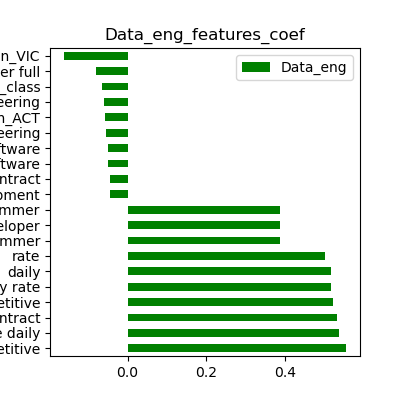

<IPython.core.display.Javascript object>


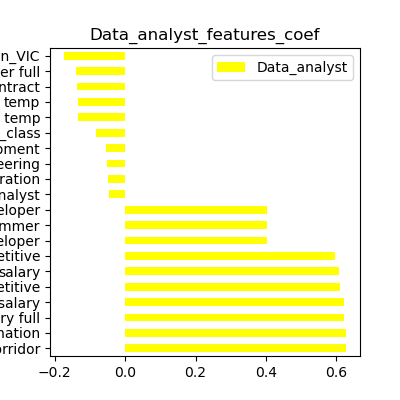

<IPython.core.display.Javascript object>


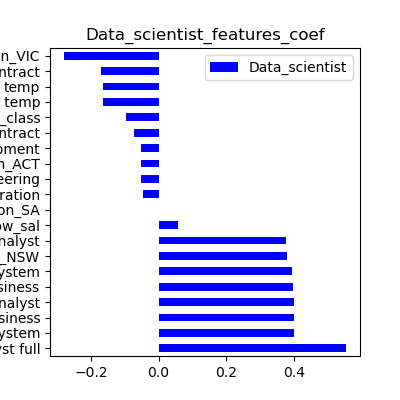

In [152]:

Data_eng_bracket = LOGREGDF2[['token','Data_eng','Data_eng_abs']].sort_values('Data_eng', ascending=False)
Data_eng_bracket_top = Data_eng_bracket[:10]
Data_eng_bracket_bottom = Data_eng_bracket[-10:]
Data_eng_bracket_merge = pd.concat([Data_eng_bracket_top, Data_eng_bracket_bottom])
Data_eng_bracket_merge.plot(kind = 'barh',
              x = 'token',
              y = 'Data_eng',
              title = 'Data_eng_features_coef',
              color = 'green',figsize = (4,4));
             

Data_analyst_bracket = LOGREGDF2[['token','Data_analyst','Data_analyst_abs']].sort_values('Data_analyst', ascending=False)

Data_analyst_bracket_top = Data_analyst_bracket[:10]
Data_analyst_bracket_bottom = Data_analyst_bracket[-10:]
Data_analyst_bracket_merge = pd.concat([Data_analyst_bracket_top, Data_analyst_bracket_bottom])
Data_analyst_bracket_merge.plot(kind = 'barh',
              x = 'token',
              y = 'Data_analyst',
              title = 'Data_analyst_features_coef',
              color = 'yellow',figsize = (4,4));

Data_scientist_bracket = LOGREGDF2[['token','Data_scientist','Data_scientist_abs']].sort_values('Data_scientist', ascending=False)
Data_scientist_bracket_top = Data_scientist_bracket[:10]
Data_scientist_bracket_bottom = Data_scientist_bracket[-10:]
Data_scientist_bracket_merge = pd.concat([Data_scientist_bracket_top, Data_scientist_bracket_bottom])
Data_scientist_bracket_merge.plot(kind = 'barh',
              x = 'token',
              y = 'Data_scientist',
              title = 'Data_scientist_features_coef',
              color = 'blue',figsize = (4,4));

# Model 2.2 - Random forest

In [142]:

RandFparams2 = {'max_depth': [8,12],
             'max_features':[10,20],
             'min_samples_split':[4,8],
             'n_estimators': [1000,1500]}

Randgs2 = GridSearchCV(RandomForestClassifier(random_state=42), RandFparams, cv = 5, n_jobs = -1, verbose=1)
Randgs2.fit(X2_train_cv31, y2_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   34.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 12], 'max_features': [10, 20],
                         'min_samples_split': [4, 8],
                         'n_estimators': [1000, 1500]},
             verbose=1)

In [143]:

RandFparamsTEST2 = {'max_depth': [8,12],
             'max_features':[10,20],
             'min_samples_split':[4,8],
             'n_estimators': [1000,1500]}

RandgsTEST2 = GridSearchCV(RandomForestClassifier(random_state=42), RandFparamsTEST2, cv = 5, n_jobs = -1, verbose=1)
RandgsTEST2.fit(X2_test_cv31, y2_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   20.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 12], 'max_features': [10, 20],
                         'min_samples_split': [4, 8],
                         'n_estimators': [1000, 1500]},
             verbose=1)

In [145]:
RandgsDF2 = pd.DataFrame({"token":X2_train_cv31.columns, 
                        "co-efficient": Randgs2.best_estimator_.feature_importances_})

In [146]:
RandgsDF2.sort_values("co-efficient", ascending = False)

,token,co-efficient
9,location_VIC,0.014529
5,location_NSW,0.013135
852,engineering,0.008053
859,engineering software,0.007035
1358,software,0.006955
...,...,...
260,1k super,0.000011
1018,law,0.000010
869,exceptional,0.000010
929,gas operation,0.000000


In [ ]:
#check if co-efficient right for random forest and visualise

In [147]:
print(Randgs2.best_estimator_ )

print(RandgsTEST2.best_estimator_)

print(Randgs2.best_score_)

print(RandgsTEST2.best_score_)

RandomForestClassifier(max_depth=12, max_features=10, min_samples_split=4,
                       n_estimators=1000, random_state=42)
RandomForestClassifier(max_depth=8, max_features=20, min_samples_split=8,
                       n_estimators=1000, random_state=42)
0.13648509763617678
0.09142857142857144


In [148]:
#Absolutely bang average performance- attributing again to the poor data quality